<a href="https://colab.research.google.com/github/OsamaM0/Machine_Learning_Projects/blob/Optimization-Projects-(Soft-Computing)/Genetic_Algorithm_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Library 

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from random import randint

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

# Data preparation 

In [ ]:
data = pd.read_csv(r"/content/healthcare-dataset-stroke-data.csv")
df=data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']]
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


# Encoding The Non Numerically Value

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(data['gender'])
df['ever_married']=le.fit_transform(data['ever_married'])
df['work_type']=le.fit_transform(data['work_type'])
df['Residence_type']=le.fit_transform(data['Residence_type'])
df['smoking_status']=le.fit_transform(data['smoking_status'])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
1,61.0,0,0,202.21,NaN,1,0,1,3,0,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2


In [ ]:
df = df.dropna(axis=0, subset=['bmi'])
df.reset_index(drop=True, inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols_to_scale=["age","avg_glucose_level","bmi"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
gender               0
ever_married         0
work_type            0
Residence_type       0
smoking_status       0
dtype: int64

In [ ]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
2300,0.414062,0,0,0.163558,0.225659,0,0,1,0,1,2
2372,0.009766,0,0,0.139692,0.150057,0,1,0,4,1,0
4337,0.523926,0,0,0.176253,0.256586,0,0,1,2,1,2
3410,0.645996,0,0,0.138722,0.216495,0,1,1,0,1,2
1989,0.829102,0,0,0.197766,0.240550,0,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
1512,0.743652,0,0,0.159865,0.172967,0,1,1,2,0,2
951,0.108887,0,0,0.354399,0.174112,0,1,0,4,1,0
4405,0.035645,0,0,0.175838,0.194731,0,1,0,4,1,0
667,0.353027,0,0,0.019112,0.292096,0,1,0,2,1,3


# split the dataset

In [ ]:
y=df['stroke']
x=df.drop('stroke',axis=1)
x.shape,y.shape

((4909, 10), (4909,))

In [ ]:
logmodel = RandomForestClassifier(n_estimators=200, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)


Text(0.5, 1.0, 'COUNT PLOT')

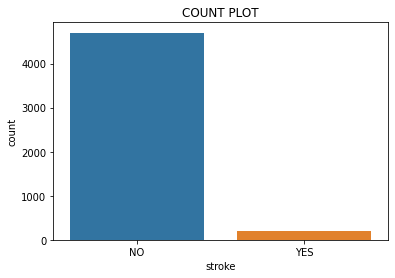

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y)
plt.xticks([0,1],['NO','YES'])
plt.title('COUNT PLOT')

# Genetic Algorithm

## initilization of population

In [ ]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        # make the chromosome all True
        chromosome = np.ones(n_feat,dtype=np.bool)   
        # make last 30% of chromosome False  
        chromosome[:int(0.3*n_feat)]=False      
        # rearrange the chromosome       
        np.random.shuffle(chromosome)
        # add the chromosome to the population 
        population.append(chromosome)
    return population

## fitness score

In [ ]:
def fitness_score(population):
    scores = []
    for chromosome in population:

        # applay optimal classifier to Traning the dataset
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    #sort by index not value & sort descending to easy select from i = 0 in selection 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 

## Selection 
select only the the highst value (bottom values)

In [ ]:
def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


## Crossover
we use one point crossovers 

we crossovers each two chromosome respectively

In [ ]:
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

## Mutatoin

In [ ]:
def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        # randomly choose the postion 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        # invert values of postion has choosen
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

## new_generation 

In [ ]:
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
chromo_df_pcos,score_pcos=generations(x,y,size=80,n_feat=x.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.9592833876221498]
Best score in generation 2 : [0.9592833876221498]
Best score in generation 3 : [0.9609120521172638]
Best score in generation 4 : [0.9592833876221498]
Best score in generation 5 : [0.9592833876221498]


In [ ]:
print("best_values: \n",chromo_df_pcos)

best_values: 
 [array([ True,  True, False,  True, False, False,  True,  True,  True,
        True]), array([ True, False, False,  True,  True, False,  True,  True,  True,
        True]), array([ True,  True, False, False, False,  True,  True,  True, False,
       False]), array([False, False, False,  True,  True, False, False,  True, False,
        True]), array([False, False, False,  True,  True,  True,  True, False, False,
       False])]


[(0.94, 1.0)]

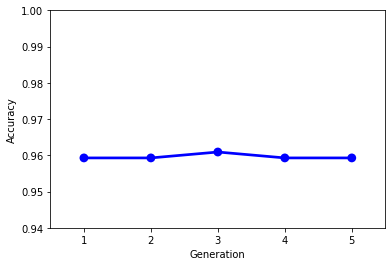

In [ ]:
gen = [1,2,3,4,5]
plt.figure(figsize=(6,4))
ax = sns.pointplot(x=gen, y=score_pcos,color = "blue" )
ax.set(xlabel="Generation", ylabel="Accuracy")
ax.set(ylim=(.94,1))
